## Diabetes

##### Imports

In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier

#### Data

In [44]:
df = pd.read_csv('diabetes.csv')

In [45]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Information about data:
##### Pregnancies: Number of times pregnant
##### Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
##### BloodPressure: Diastolic blood pressure (mm Hg)
##### SkinThickness: Triceps skin fold thickness (mm)
##### Insulin: 2-Hour serum insulin (mu U/ml)
##### BMI: Body mass index (weight in kg/(height in m)^2)
##### DiabetesPedigreeFunction: Diabetes pedigree function
##### Age: Age (years)
##### Outcome: Class variable (0 or 1)

### Handling NA Values

##### As you can see below it seems we have no missing value problems

In [47]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.694010,30.462388,44.000,99.75000,117.0000,141.00000,199.00
BloodPressure,768.0,72.399740,12.108068,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.204427,8.933982,7.000,25.00000,28.0000,33.00000,99.00
Insulin,768.0,141.510417,89.140952,14.000,102.00000,102.0000,169.00000,846.00
BMI,768.0,32.435286,6.881492,18.200,27.50000,32.0500,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00
Glu_Blood,768.0,0.295573,0.456597,0.000,0.00000,0.0000,1.00000,1.00


##### However if you look at the min values of some variables, you will notice that some values should not be "0"

##### We understand that missing values represented with zeros. Lets fix these values

In [49]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [50]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

##### As you can see we recovered the NA values. Now lets handle variables containing NA values one by one checking their relationship with Outcome variable with the following function

In [51]:
def missing_target(variable):   
    template = df[df[variable].notnull()]
    template = template[[variable, 'Outcome']].groupby(['Outcome'])[[variable]].mean().reset_index()
    return template

#### Glucose

In [52]:
missing_target('Glucose')

,Outcome,Glucose
0,0,110.643863
1,1,142.319549


##### It appears that the mean of glucose is a factor effecting the outcome. Therefore we will fill the missing values by assigning the mean of Glucose. However we will take a look at the outcome of that person and if the outcome of that person is 0, we will assign the first mean value of tha table above. If the outcome is 1 we will assign the second value

In [53]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 110
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 142

In [54]:
df.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

##### As you can see above we handled the missing values in Glucose variable

#### BloodPressure

In [55]:
missing_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.877339
1,1,75.321429


##### We will assign values as we did in Glucose variable

In [56]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 75

In [57]:
df.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

##### As you can see above we handled the missing values in BloodPressure variable too

#### SkinThickness

In [58]:
missing_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.235457
1,1,33.000000


##### We will assign values with the same method we used in variables above

In [59]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 33

In [60]:
df.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

#### Insulin

In [61]:
df["Insulin"].describe()

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

##### As you can see above Insulin variable have some high values can be clasified as outliers. That is why we will update our "missing_target" function as follows

In [62]:
def missing_target_median(variable):   
    template = df[df[variable].notnull()]
    template = template[[variable, 'Outcome']].groupby(['Outcome'])[[variable]].median().reset_index()
    return template

In [63]:
missing_target_median('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


##### We will assign values with the same method we used in variables above but this time we ar assignin median values

In [64]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 102
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 169

In [65]:
df.isna().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

#### BMI

In [66]:
missing_target('BMI')

,Outcome,BMI
0,0,30.859674
1,1,35.406767


##### We will assign values with the same method we used in variables above

In [67]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 35

In [68]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Feature Engineering

#### According to the medical resources:
##### Healthy peoples' blood pressure levels should be less than 80 and glucose levels should be less than 105
##### For BMI 30 is the limit to obesity

##### Healthy peoples' skin thickness should be less than 28 and Insulin levels should be less than 155

In [70]:
df.loc[:,'Glu_Blood']=0
df.loc[(df['Glucose']<=105) & (df['BloodPressure']<=80),'Glu_Blood']=1

In [72]:
df.loc[:,'Obesity']=0
df.loc[(df['BMI']<=30),'Obesity']=1

In [74]:
df.loc[:,'Ins_Thick']=0
df.loc[(df['SkinThickness']<=28) & (df['Insulin']<=155),'Ins_Thick']=1

In [75]:
df['Preg_Age'] =  df['Pregnancies'] / df['Age']
df['Glu_Func'] = df['Glucose'] / df['DiabetesPedigreeFunction']
df['Age_Ins'] = df['Age'] / df['Insulin']

### Rare Encoding

##### Lets see is there any rare values in our data set 

In [115]:
for col in df.columns:
    print(col, ":", df[col].nunique())


Pregnancies : 17
Glucose : 135
BloodPressure : 46
SkinThickness : 50
Insulin : 187
BMI : 247
DiabetesPedigreeFunction : 517
Age : 52
Outcome : 2
Glu_Blood : 2
Obesity : 2
Ins_Thick : 2
Preg_Age : 206
Glu_Func : 766
Age_Ins : 431


In [127]:
[col for col in df.columns if (df[col].nunique()<3) and (df[col].value_counts() / len(df) < 0.10).any(axis=None)]


[]

##### As you can see above there is no rare values in our variables can be classified as categorical

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Glu_Blood                 768 non-null    int64  
 10  Obesity                   768 non-null    int64  
 11  Ins_Thick                 768 non-null    int64  
 12  Preg_Age                  768 non-null    float64
 13  Glu_Func                  768 non-null    float64
 14  Age_Ins   

##### It seems swe are ready to go on modelling

## Models

##### Lets split our data to create train and test 

In [133]:
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

#### CART

In [135]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [136]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8268398268398268

##### Above we made prediction and calculated our accuracy. Lets try to increase our accuracy using grid search method and cross validation

In [139]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }


##### Here we created a grid to find the best combination of hiper parameters

In [141]:
cart = DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 5, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 1616 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    5.4s finished


In [142]:
print("Best Parameters: " + str(cart_cv_model.best_params_))

Best Parameters: {'max_depth': 6, 'min_samples_split': 2}


##### Above is the return of our best conbination of hiper parameters

In [144]:
cart = DecisionTreeClassifier(max_depth = 6, min_samples_split = 2)
cart_tuned = cart.fit(X_train, y_train)

##### Above we updated our hiper parameters according to the return of our grid search method and below we fit the model with these new values

In [146]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8484848484848485

##### As you can see above our accuracy score a litle bit less than our base modal

#### Random forest

##### Lets fit our base modal

In [147]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [148]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8787878787878788

##### Above we made prediction and calculated our accuracy. Lets try to increase our accuracy using grid search method and cross validation

In [149]:
rf_params = {"max_depth": [2,5,10],
            "max_features": [2,6,12],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [150]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 2) 

In [151]:
rf_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  2.4min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10], 'max_features': [2, 6, 12],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [152]:
print("Best Parameters: " + str(rf_cv_model.best_params_))

Best Parameters: {'max_depth': 10, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 500}


In [163]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 2, 
                                  min_samples_split = 5,
                                  n_estimators = 500)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=2, min_samples_split=5,
                       n_estimators=500)

##### Above we updated our hiper parameters according to the return of our grid search method and below we fit the model with these new values

In [164]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8744588744588745

##### As you can see above our accuracy score is almost the same with our base modal. Now lets take look at feature importances according to our Random Forest modal

Text(0.5, 0, 'Feature Importances')

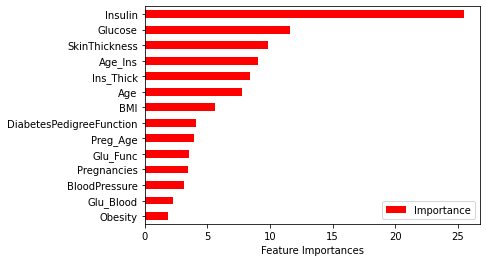

In [167]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Feature Importances")

#### Light GBM

##### Below we fit the Light GBM modal and than calculated the base modals accuracy

In [168]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [169]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8787878787878788

##### Lets try to increase our accuracy as we did earlier with other modals

In [170]:
lgbm_params = {
        'n_estimators': [ 500, 1000, 2000],
        'subsample': [ 0.8, 1.0],
        'max_depth': [3, 5,10],
        'learning_rate': [0.1,0.01,0.001],
        "min_child_samples": [5,10,20]}

In [171]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv = 5, n_jobs = -1, verbose = 2)

In [172]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  2.2min finished


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 10],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [500, 1000, 2000],
                         'subsample': [0.8, 1.0]},
             verbose=2)

In [173]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_samples': 5,
 'n_estimators': 1000,
 'subsample': 0.8}

##### Above is the best hiper parameter combination return from grid search method. We configure our modal below wtih these parameters

In [174]:
lgbm = LGBMClassifier(learning_rate = 0.01, 
                    max_depth = 3,
                    min_samples_split = 5,
                    n_estimators = 1000,
                    subsample = 0.8)

In [175]:
lgbm_tuned =  lgbm.fit(X_train,y_train)

In [176]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8831168831168831

##### As you can see modal tuning seems to be worked out

### Comparing the Modals

In [177]:
modals = [cart_tuned, rf_tuned, lgbm_tuned]
for m in modals:
    names = m.__class__.__name__
    y_pred = m.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

----------------------------
DecisionTreeClassifier:
Accuracy: 84.8485%
----------------------------
RandomForestClassifier:
Accuracy: 87.4459%
----------------------------
LGBMClassifier:
Accuracy: 88.3117%


##### As you can see above we compared the modals and Light GBM seems to be winner.